# **Monte-Carlo Simulation of Discrete-Time Stochastic Processes in Python**

## **20-step Random Walk**

[ 0.         -1.20441343  0.14910014 -1.56440493 -1.26549275 -1.27874001
 -0.63850628  0.02350023  0.01488292  1.94610473 -0.33783725 -1.52265601
 -1.910856   -0.09718897 -2.21270918  0.08853262  1.22021689  1.25228695
 -0.53387937 -0.19272545]
[100.          98.79558657  98.94468671  97.38028177  96.11478903
  94.83604901  94.19754273  94.22104296  94.23592588  96.18203061
  95.84419337  94.32153736  92.41068136  92.31349239  90.10078321
  90.18931583  91.40953272  92.66181966  92.12794029  91.93521485]


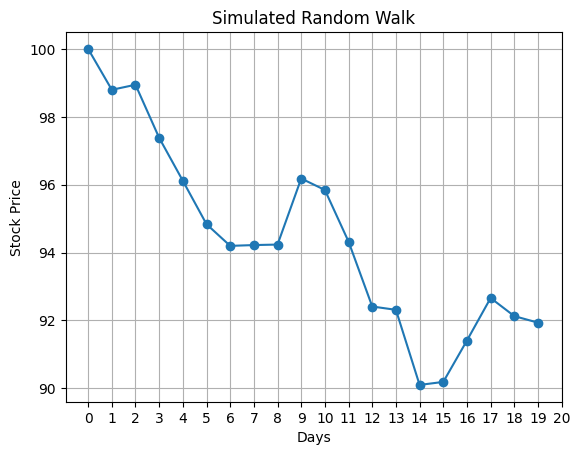

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

# Generate 20 random steps with mean=0 and SD=1
steps = np.random.normal(loc=0, scale=1, size=20)

steps[0] = 0
print(steps)

# Simulate stock prices, P, with a starting price of 100
P = 100 + np.cumsum(steps)
print(P)

# Plot the simulated stock prices
plt.plot(P, marker='o')
plt.title("Simulated Random Walk")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.xticks(np.arange(0, 21, 1))
plt.grid(True)
plt.show()

## **Many simulations of a one-year daily walk**

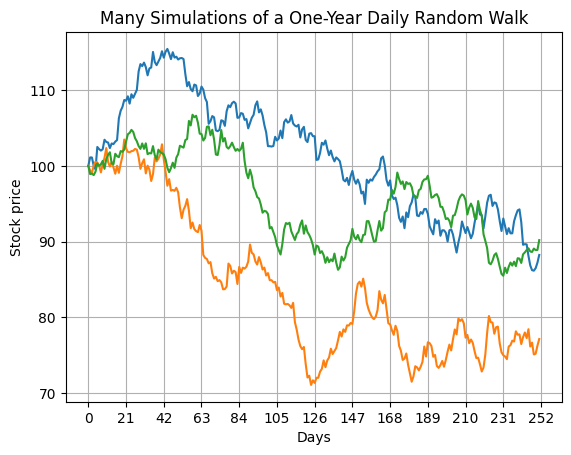

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulations and the number of days
num_simulations = 50000
num_days = 252

# Create an array to store the simulated stock prices for each simulation
simulated_prices = np.zeros((num_simulations, num_days))

# Perform the simulations
for i in range(num_simulations):
    # Generate random steps with mean=0 and SD=1 for each day
    steps = np.random.normal(loc=0, scale=1, size=num_days)
    
    # Set the initial price for each simulation
    simulated_prices[i, 0] = 100
    
    # Simulate the stock prices for each day
    for j in range(1, num_days):
        simulated_prices[i, j] = simulated_prices[i, j-1] + steps[j]
    
# Randomly select 3 paths to plot
random_paths = np.random.choice(num_simulations, size=3, replace=False)

# Plot the selected paths
for i in random_paths:
    plt.plot(simulated_prices[i])

plt.title("Many Simulations of a One-Year Daily Random Walk")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.xticks(np.arange(0, num_days+1, 21))
plt.grid(True)
plt.show()

## **Simulating a lognormal price process**

Play around with the ```num_simulations``` variable to see how the plots change

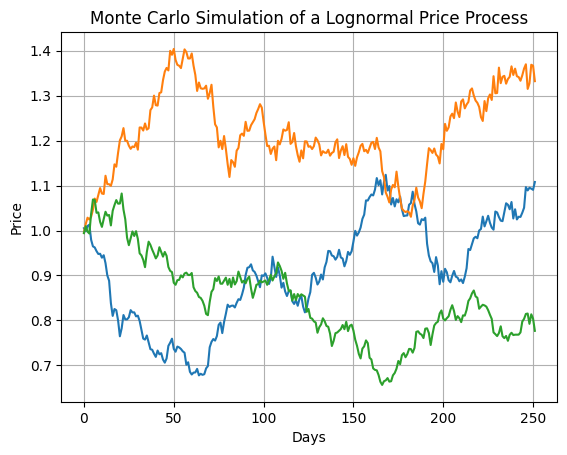

Mean from the simulation is 0.041483 while the expected log returns is 0.056541
	
SD of the distribution of the simulation is 0.29147 while the SD is 0.3


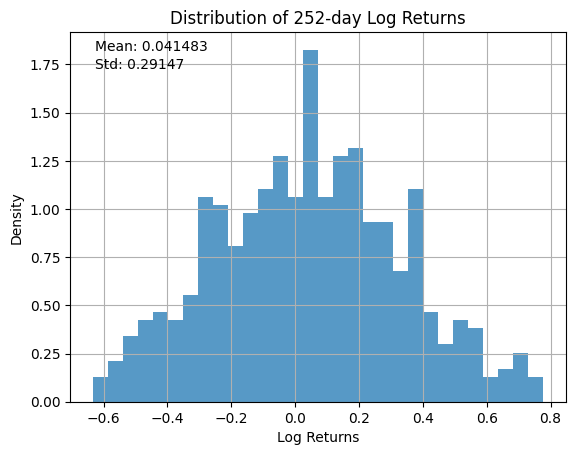

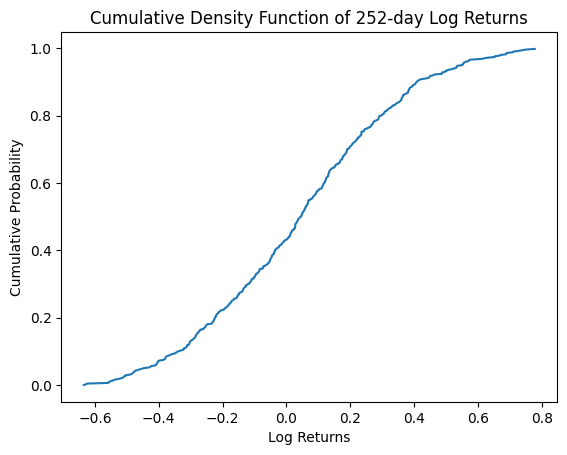

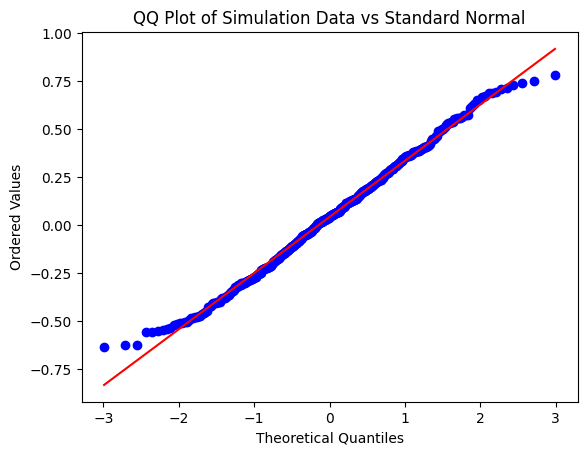

In [3]:
# Set parameters
mean = 0.1
sigma = 0.3

# Calculate the daily mean and standard deviation
daily_mean = mean / 252
daily_vol = sigma / np.sqrt(252)

# Set the initial price and number of days
initial_price = 1
num_days = 252

# Define the number of simulations
num_simulations = 500

# Create an array to store the simulated prices for each simulation
simulated_prices = np.zeros((num_simulations, num_days))


# Perform the simulations
for i in range(num_simulations):
    """
    The simulation is run by generating a random set of returns from a gaussian distribution, with mean daily_mean and volatility
    daily_volatility. Once I have a random return per each day (which is expressed in percetages) I run the cumulative product of such
    returns. I do so to obtained the overall return at each day. Then I multiply the initial price by these returns. I do this to
    achieve the computation in a vectorial manner instead of iteraring. Otherwise I would need a loop where at each price at time t I
    multiply it by the current return and obtain the price at the next timestamp and then multiply again
    With this approach I multiply a single initial price by a list of comulative returns.
    """

    # Generate random daily returns
    daily_returns = np.random.normal(daily_mean, daily_vol, num_days)
    
    # Calculate the cumulative returns
    cumulative_returns = np.cumprod(1 + daily_returns)
    
    # Calculate the simulated prices
    simulated_prices[i] = initial_price * cumulative_returns

# Randomly select 3 paths to plot
random_paths = np.random.choice(num_simulations, size=3, replace=False)

# Plot the selected paths
for i in random_paths:
    plt.plot(simulated_prices[i])

plt.title("Monte Carlo Simulation of a Lognormal Price Process")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Use the 1st and 2nd moments distribution
log_returns= np.log(simulated_prices[:, -1] / initial_price)

Expected_log_return = round(math.exp(mean - ((sigma**2)/2)) -1, 6)

mean_from_simulation = round(np.mean(log_returns), 6)
print("Mean from the simulation is", mean_from_simulation, "while the expected log returns is", Expected_log_return)

print("\t")

std_from_simulation = round(np.std(log_returns), 6)
print("SD of the distribution of the simulation is", std_from_simulation, "while the SD is", sigma)

# Plot the distribution of the simulation
plt.hist(log_returns, bins=30, density=True, alpha=0.75)
plt.title("Distribution of 252-day Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.grid(True)
plt.annotate(f"Mean: {mean_from_simulation}", xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(f"Std: {std_from_simulation}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

# Plot the cumulative density function of the simulation
plt.plot(np.sort(log_returns), np.linspace(0, 1, len(log_returns), endpoint=False))
plt.title("Cumulative Density Function of 252-day Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Cumulative Probability")
plt.show()

# Generate a QQ plot
stats.probplot(log_returns, dist="norm", plot=plt)
plt.title("QQ Plot of Simulation Data vs Standard Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

## **Simulate an AR(1) process**

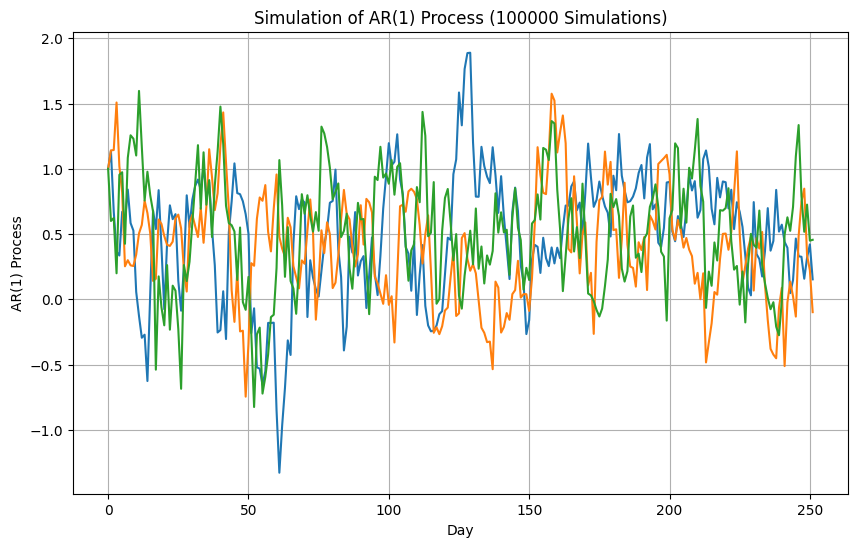

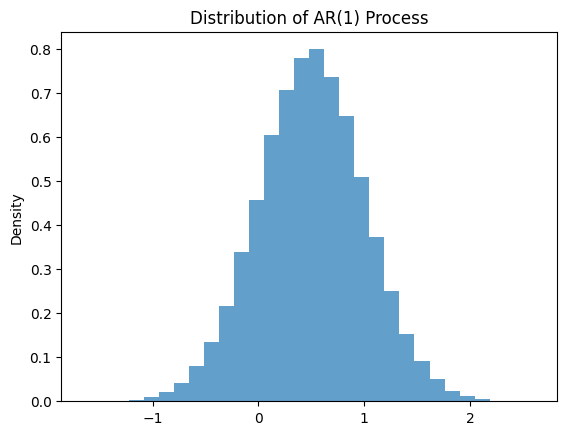

In [4]:
# Parameters
mu = 0.1  # Mean of the AR(1) process
phi = 0.8  # Autoregressive coefficient
sigma = 0.3  # Standard deviation of the process
n_days = 252  # Number of days to simulate
n_simulations = 100000  # Number of simulations

# Generate AR(1) processes
np.random.seed(42)

epsilon = np.random.normal(0, sigma, (n_simulations, n_days))

paths = np.zeros((n_simulations, n_days))

paths[:, 0] = 1  # Set initial value to 1

for i in range(1, n_days):
    paths[:, i] = mu + phi * paths[:, i-1] + epsilon[:, i]

# Plot 3 random paths
random_indices = np.random.choice(n_simulations, size=3, replace=False)

plt.figure(figsize=(10, 6))

for i in random_indices:
    plt.plot(range(n_days), paths[i])
    
plt.xlabel('Day')
plt.ylabel('AR(1) Process')
plt.title('Simulation of AR(1) Process ({} Simulations)'.format(n_simulations))
plt.grid(True)
plt.show()

plt.hist(paths[:, -1], bins=30, density=True, alpha=0.7)
plt.ylabel('Density')
plt.title('Distribution of AR(1) Process')
plt.show()